In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

### Archivo ynn5-77cb.csv

Este archivo proporciona una detallada descripción de los centros poblados en Colombia, incluyendo sus códigos de identificación, nombres, ubicaciones geográficas y clasificaciones administrativas

In [ ]:
df = pd.read_csv('https://www.datos.gov.co/resource/ynn5-77cb.csv?$limit=9000')
df.head(2)

,Código Departamento,Código Municipio,Código Centro Poblado,Nombre Departamento,Nombre Municipio,Nombre Centro Poblado,Tipo Centro Poblado,Ubicación,Longitud,Latitud,Distrito,Tipo de Municipio,Area Metropolitana
0,5,5001,5001000,ANTIOQUIA,MEDELLÍN,MEDELLÍN,CABECERA MUNICIPAL (CM),"(6.24858636743, -75.5760017134)",-75.576002,6.248586,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRÁ
1,5,5001,5001001,ANTIOQUIA,MEDELLÍN,PALMITAS,CABECERA CORREGIMIENTO MUNICIPAL (C),"(6.3439224059, -75.6899859872)",-75.689986,6.343922,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRÁ


### Archivo MGN2022_MPIO_POLITICO.zip

Este archivo proporciona una descripción completa de los municipios colombianos, incluyendo sus códigos de identificación, nombres, áreas, referencias legales de creación, y representaciones geográficas en formato de polígonos. El archivo proporciona datos geoespaciales que representan el perímetro y la extensión del área de cada municipio en formato de polígono, pero no incluye coordenadas específicas de las cabeceras municipales, que si las incluye el archivo anterior

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/analytics_data_proyect/MGN2022_MPIO_POLITICO.zip')
gdf.head(10)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,97,001,97001,VAUPÉS,MITÚ,Decreto Nal 1666 del 6 de Agosto de 1974,16215.737264,4,2022,MUNICIPIO,6.352591,1.312171,"POLYGON ((-70.41904 1.77173, -70.41723 1.77150..."
1,97,161,97161,VAUPÉS,CARURÚ,Ordenanza 003 del 7 de Agosto de 1993,6368.486418,4,2022,MUNICIPIO,4.618318,0.516272,"POLYGON ((-71.36685 1.73621, -71.36728 1.73566..."
2,97,511,97511,VAUPÉS,PACOA,1967,13993.250574,4,2022,ÁREA NO MUNICIPALIZADA,9.172139,1.133315,"POLYGON ((-71.57715 0.68364, -71.55278 0.66162..."
3,97,666,97666,VAUPÉS,TARAIRA,Ordenanza 22 del 27 de Noviembre de 1992,6510.246561,4,2022,MUNICIPIO,6.710582,0.526121,"POLYGON ((-70.05217 -0.14663, -70.05228 -0.146..."
4,97,777,97777,VAUPÉS,PAPUNAHUA,1977,5551.153548,4,2022,ÁREA NO MUNICIPALIZADA,5.428252,0.449587,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002..."
5,97,889,97889,VAUPÉS,YAVARATÉ,Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.405650,4,2022,ÁREA NO MUNICIPALIZADA,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833..."
6,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.834005,4,2022,MUNICIPIO,1.035380,0.030608,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
7,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2022,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
8,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2022,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
9,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2022,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."


### Merge de los archivos
Objetivo: Generar un nuevo dataframe que contenga tanto las coordenadas de las cabeceras municipales como los polígonos de los municipios. La idea es unir ambos conjuntos de datos en función de un identificador común: código del municipio

In [ ]:
# Dataframe de centros poblados se filtra para que se muestre solo hasta nivel de municipio
categorias_filtradas = ['CABECERA MUNICIPAL (CM)', 'CABECERA CORREGIMIENTO DEPARTAMENTAL (CD)']
df_filtrado = df[df['Tipo Centro Poblado'].isin(categorias_filtradas)].copy()

# Mostrar el DataFrame filtrado
print(df_filtrado.shape)
df_filtrado.head(2)

(1122, 13)


,Código Departamento,Código Municipio,Código Centro Poblado,Nombre Departamento,Nombre Municipio,Nombre Centro Poblado,Tipo Centro Poblado,Ubicación,Longitud,Latitud,Distrito,Tipo de Municipio,Area Metropolitana
0,5,5001,5001000,ANTIOQUIA,MEDELLÍN,MEDELLÍN,CABECERA MUNICIPAL (CM),"(6.24858636743, -75.5760017134)",-75.576002,6.248586,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRÁ
30,5,5002,5002000,ANTIOQUIA,ABEJORRAL,ABEJORRAL,CABECERA MUNICIPAL (CM),"(5.78930111433, -75.4287403904)",-75.428740,5.789301,NaN,MUNICIPIO,NaN


## Codigo de municipio: Columna clave de union para el merge

- La columna debe estar presente en los dos conjuntos de datos. En el df se llama: 'Código Municipio" y en gdf 'MPIO_CDPMP'.
- Deben ser del mismo tipo de dato. Para nuestro caso nos aseguramos que ambas columnas sean string.
- Valores coincidentes: En el DataFrame (df), los códigos de los municipios tienen solo 4 caracteres cuando el código del departamento es de un solo dígito. En cambio, en el GeoDataFrame (gdf), todos los códigos de los municipios tienen 5 caracteres, ya que a los departamentos cuyo código es de un solo dígito se les adiciona un cero a la izquierda. Esto se debe corregir.

In [ ]:
# Convertir los tipos de datos de las columnas de clave para que coincidan
df_filtrado['Código Municipio'] = df_filtrado['Código Municipio'].astype(str)
gdf['MPIO_CDPMP'] = gdf['MPIO_CDPMP'].astype(str)

print(df_filtrado['Código Municipio'].dtype)
print(gdf['MPIO_CDPMP'].dtype)

object
object


In [ ]:
# Convertir los códigos a string y asegurarse de que tengan 5 caracteres
df_filtrado['Código Municipio'] = df['Código Municipio'].astype(str).apply(lambda x: x.zfill(5))
df_filtrado['Código Municipio']

,Código Municipio
0,05001
30,05002
35,05004
37,05021
38,05030
...,...
8031,99524
8037,99624
8039,99773
8059,97511


In [ ]:
# Verificar que los valores de las columnas clave tienen coincidencia
cod_df_filtrado = set(df_filtrado['Código Municipio'].unique())
cod_gdf = set(gdf['MPIO_CDPMP'].unique())
comunes = cod_df_filtrado.intersection(cod_gdf)
len(comunes)

1121

In [ ]:
# Merge de los dos set de datos
# Seleccionar las columnas necesarias del DataFrame
columnas_df_filtrado = df_filtrado[['Código Municipio', 'Ubicación', 'Longitud', 'Latitud']]

# Seleccionar las columnas necesarias del GeoDataFrame y eliminar las columnas no deseadas
columnas_gdf = gdf.drop(columns=['MPIO_CRSLC', 'MPIO_CSMBL', 'MPIO_VGNC', 'MPIO_TIPO'])

# Realizar el merge
merged_gdf = columnas_gdf.merge(columnas_df_filtrado, left_on='MPIO_CDPMP', right_on='Código Municipio')

# Renombra las columnas del GeoDataFrame resultante
merged_gdf = merged_gdf.rename(columns={
    'DPTO_CCDGO': 'Codigo_Depto',
    'MPIO_CCDGO': 'Codigo_Mupio',
    'MPIO_CDPMP': 'Codigo_completo',
    'DPTO_CNMBR': 'Nombre_Depto',
    'MPIO_CNMBR': 'Nombre_Mupio',
    'MPIO_NAREA': 'Area_Mupio',
    'Shape_Leng': 'Perimetro',
    'Shape_Area': 'Area',
    'Ubicación': 'Ubicacion'
})

# Eliminar columnas sobrantes
merged_gdf = merged_gdf.drop(columns='Código Municipio')

# Mostrar el resultado
print(type(merged_gdf))
merged_gdf.head(10)

<class 'geopandas.geodataframe.GeoDataFrame'>


,Codigo_Depto,Codigo_Mupio,Codigo_completo,Nombre_Depto,Nombre_Mupio,Area_Mupio,Perimetro,Area,geometry,Ubicacion,Longitud,Latitud
0,97,001,97001,VAUPÉS,MITÚ,16215.737264,6.352591,1.312171,"POLYGON ((-70.41904 1.77173, -70.41723 1.77150...","(1.25118655571, -70.2347514774)",-70.234751,1.251187
1,97,161,97161,VAUPÉS,CARURÚ,6368.486418,4.618318,0.516272,"POLYGON ((-71.36685 1.73621, -71.36728 1.73566...","(1.014600462, -71.297793263)",-71.297793,1.014600
2,97,511,97511,VAUPÉS,PACOA,13993.250574,9.172139,1.133315,"POLYGON ((-71.57715 0.68364, -71.55278 0.66162...","(0.020702343627, -71.0043443529)",-71.004344,0.020702
3,97,666,97666,VAUPÉS,TARAIRA,6510.246561,6.710582,0.526121,"POLYGON ((-70.05217 -0.14663, -70.05228 -0.146...","(-0.568198309995, -69.6402663643)",-69.640266,-0.568198
4,97,777,97777,VAUPÉS,PAPUNAHUA,5551.153548,5.428252,0.449587,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002...","(1.90795459524, -70.760606157)",-70.760606,1.907955
5,97,889,97889,VAUPÉS,YAVARATÉ,4660.405650,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833...","(0.609141827242, -69.2033361301)",-69.203336,0.609142
6,05,001,05001,ANTIOQUIA,MEDELLÍN,374.834005,1.035380,0.030608,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360...","(6.24858636743, -75.5760017134)",-75.576002,6.248586
7,05,002,05002,ANTIOQUIA,ABEJORRAL,507.141095,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571...","(5.78930111433, -75.4287403904)",-75.428740,5.789301
8,05,004,05004,ANTIOQUIA,ABRIAQUÍ,296.894050,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048...","(6.63228195504, -76.0642948678)",-76.064295,6.632282
9,05,021,05021,ANTIOQUIA,ALEJANDRÍA,128.932153,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585...","(6.37606264274, -75.141334501)",-75.141335,6.376063


### Pruebas geopandas

<Axes: >

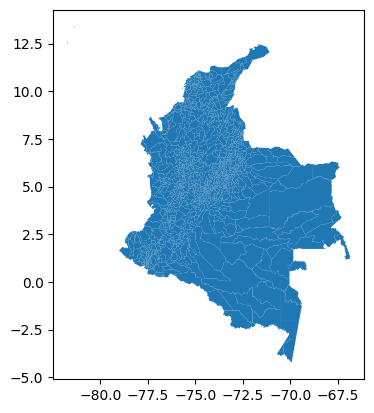

In [ ]:
merged_gdf.plot()

<Axes: >

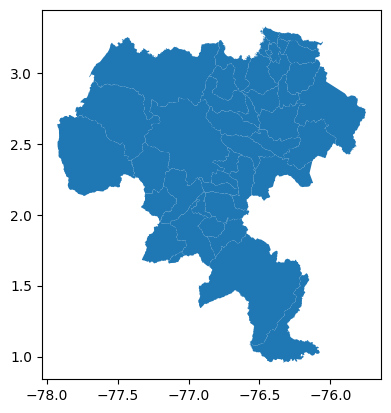

In [ ]:
cauca = merged_gdf[merged_gdf['Nombre_Depto']=='CAUCA']
cauca.plot()

In [ ]:
# Crear una nueva columna 'Cabecera' con puntos geométricos a partir de Longitud y Latitud
merged_gdf['Cabecera'] = merged_gdf.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Verificar el GeoDataFrame con la nueva columna de puntos
print(merged_gdf[['Nombre_Mupio', 'Cabecera']].head())

  Nombre_Mupio                    Cabecera
0         MITÚ   POINT (-70.23475 1.25119)
1       CARURÚ   POINT (-71.29779 1.01460)
2        PACOA   POINT (-71.00434 0.02070)
3      TARAIRA  POINT (-69.64027 -0.56820)
4    PAPUNAHUA   POINT (-70.76061 1.90795)


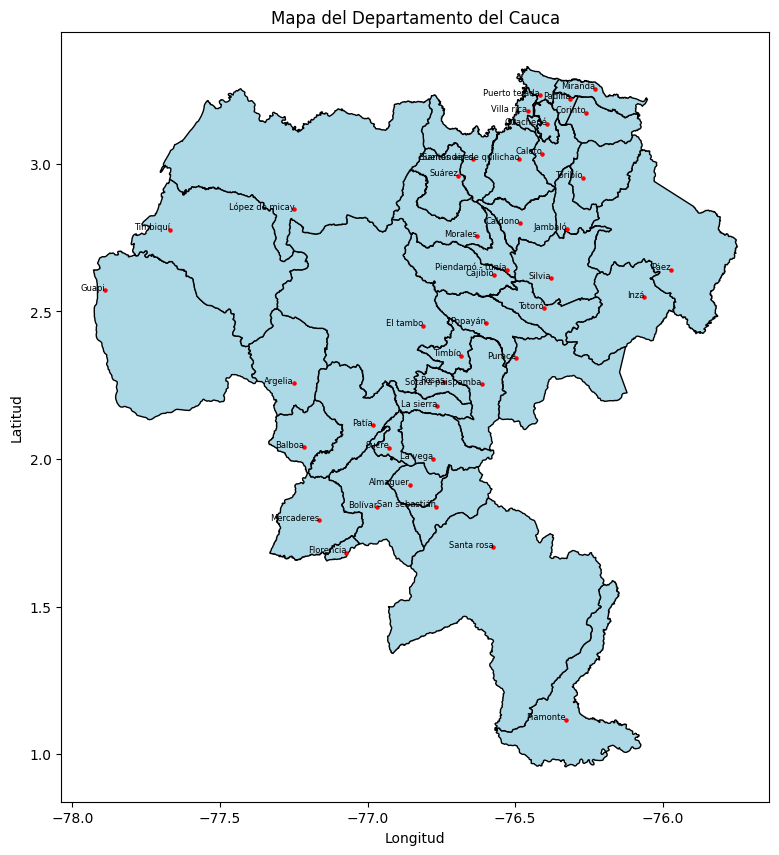

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que merged_gdf es tu GeoDataFrame y que ya has creado la columna 'Cabecera'
# Filtrar solo los municipios del departamento del Cauca
cauca_gdf = merged_gdf[merged_gdf['Nombre_Depto'].str.upper() == 'CAUCA']

# Convertir la columna 'Cabecera' a un GeoSeries para poder plotearla
cabecera_gdf = gpd.GeoDataFrame(cauca_gdf, geometry='Cabecera')

# Plotear el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotear los polígonos de los municipios
cauca_gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotear los puntos de las cabeceras municipales
cabecera_gdf.plot(ax=ax, color='red', markersize=5)

# Añadir los nombres de los municipios
for x, y, label in zip(cauca_gdf['Cabecera'].x, cauca_gdf['Cabecera'].y, cauca_gdf['Nombre_Mupio']):
    ax.text(x, y, label.capitalize(), fontsize=6, ha='right')


# Añadir título y etiquetas
ax.set_title('Mapa del Departamento del Cauca')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

### Generar archivos csv para incluir en base de datos

In [ ]:
# Extraer información única de departamentos
departamentos_df = merged_gdf[['Codigo_Depto', 'Nombre_Depto']].drop_duplicates().reset_index(drop=True)

# Cambiar nombres de columnas para ajustarlos a bd
departamentos_df = departamentos_df.rename(columns={'Codigo_Depto': 'dept_code',
                                                    'Nombre_Depto': 'dept_name'})

# Agregar columna 'source_id' con valor 1 en todas las filas
departamentos_df['source_1'] = 1
departamentos_df['source_2'] = 2


# Extraer información de municipios
municipios_df = merged_gdf[['Codigo_Mupio', 'Codigo_Depto', 'Nombre_Mupio', 'Area_Mupio', 'Perimetro', 'Area', 'geometry', 'Cabecera']]

# Cambiar nombres de columnas para ajustarlos a la bd
municipios_df = municipios_df.rename(columns={'Codigo_Mupio': 'mupio_code',
                                              'Codigo_Depto': 'dept_code',
                                              'Nombre_Mupio': 'mupio_name',
                                              'Area_Mupio': 'mupio_area',
                                              'Perimetro': 'perimeter',
                                              'Area': 'shape_area',
                                              'Cabecera': 'mupal_head'})

# Agregar columna 'source_id' con valor 1 en todos los municipios
municipios_df['source_1'] = 1
municipios_df['source_2'] = 2


In [ ]:
# Crear nueva columna con combinacion de codigo dept + mpio para utilizar como llave primaria
municipios_df['dept_mpio_code'] = municipios_df['dept_code'].astype(str) + municipios_df['mupio_code'].astype(str)

In [ ]:
# Reordenar las columnas para colocar 'dept_mpio_code' al principio
cols = ['dept_mpio_code'] + [col for col in municipios_df.columns if col != 'dept_mpio_code']
municipios_df = municipios_df[cols]

In [ ]:
print(type(departamentos_df))
print(departamentos_df.shape)
departamentos_df.head()

<class 'pandas.core.frame.DataFrame'>
(33, 4)


,dept_code,dept_name,source_1,source_2
0,97,VAUPÉS,1,2
1,05,ANTIOQUIA,1,2
2,08,ATLÁNTICO,1,2
3,11,"BOGOTÁ, D.C.",1,2
4,13,BOLÍVAR,1,2


In [ ]:
import unicodedata
# Funcion para remover acentos y otros caracteres
def remove_accents_and_special_chars(input_str):
    # Normalizar la cadena a NFKD
    nfkd_form = unicodedata.normalize('NFKD', input_str)

    # Eliminar acentos
    no_accents = ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

    # Definir caracteres no deseados
    unwanted_chars = [',', ';', '!', '?','#','$', '%']

    # Eliminar caracteres no deseados
    result = ''.join([c for c in no_accents if c not in unwanted_chars])

    return result

In [ ]:
# Aplicar la función para eliminar tildes en departamentos
departamentos_df['dept_name'] = departamentos_df['dept_name'].apply(remove_accents_and_special_chars)
departamentos_df.head()

,dept_code,dept_name,source_1,source_2
0,97,VAUPES,1,2
1,05,ANTIOQUIA,1,2
2,08,ATLANTICO,1,2
3,11,BOGOTA D.C.,1,2
4,13,BOLIVAR,1,2


In [ ]:
print(type(municipios_df))
print(municipios_df.shape)
municipios_df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(1121, 11)


,dept_mpio_code,mupio_code,dept_code,mupio_name,mupio_area,perimeter,shape_area,geometry,mupal_head,source_1,source_2
0,97001,001,97,MITÚ,16215.737264,6.352591,1.312171,"POLYGON ((-70.41904 1.77173, -70.41723 1.77150...",POINT (-70.23475 1.25119),1,2
1,97161,161,97,CARURÚ,6368.486418,4.618318,0.516272,"POLYGON ((-71.36685 1.73621, -71.36728 1.73566...",POINT (-71.29779 1.01460),1,2
2,97511,511,97,PACOA,13993.250574,9.172139,1.133315,"POLYGON ((-71.57715 0.68364, -71.55278 0.66162...",POINT (-71.00434 0.02070),1,2
3,97666,666,97,TARAIRA,6510.246561,6.710582,0.526121,"POLYGON ((-70.05217 -0.14663, -70.05228 -0.146...",POINT (-69.64027 -0.56820),1,2
4,97777,777,97,PAPUNAHUA,5551.153548,5.428252,0.449587,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002...",POINT (-70.76061 1.90795),1,2


In [ ]:
# Aplicar la función para eliminar tildes en municipios
municipios_df['mupio_name'] = municipios_df['mupio_name'].apply(remove_accents_and_special_chars)
municipios_df.head()

,dept_mpio_code,mupio_code,dept_code,mupio_name,mupio_area,perimeter,shape_area,geometry,mupal_head,source_1,source_2
0,97001,001,97,MITU,16215.737264,6.352591,1.312171,"POLYGON ((-70.41904 1.77173, -70.41723 1.77150...",POINT (-70.23475 1.25119),1,2
1,97161,161,97,CARURU,6368.486418,4.618318,0.516272,"POLYGON ((-71.36685 1.73621, -71.36728 1.73566...",POINT (-71.29779 1.01460),1,2
2,97511,511,97,PACOA,13993.250574,9.172139,1.133315,"POLYGON ((-71.57715 0.68364, -71.55278 0.66162...",POINT (-71.00434 0.02070),1,2
3,97666,666,97,TARAIRA,6510.246561,6.710582,0.526121,"POLYGON ((-70.05217 -0.14663, -70.05228 -0.146...",POINT (-69.64027 -0.56820),1,2
4,97777,777,97,PAPUNAHUA,5551.153548,5.428252,0.449587,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002...",POINT (-70.76061 1.90795),1,2


In [ ]:
# Guardar en archivos CSV en el drive
departamentos_df.to_csv('/content/drive/MyDrive/analytics_data_proyect/initial_transformation/departaments.csv', index=False)
municipios_df.to_csv('/content/drive/MyDrive/analytics_data_proyect/initial_transformation/municipalities.csv', index=False)

In [ ]:
municipios_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   dept_mpio_code  1121 non-null   object  
 1   mupio_code      1121 non-null   object  
 2   dept_code       1121 non-null   object  
 3   mupio_name      1121 non-null   object  
 4   mupio_area      1121 non-null   float64 
 5   perimeter       1121 non-null   float64 
 6   shape_area      1121 non-null   float64 
 7   geometry        1121 non-null   geometry
 8   mupal_head      1121 non-null   geometry
 9   source_1        1121 non-null   int64   
 10  source_2        1121 non-null   int64   
dtypes: float64(3), geometry(2), int64(2), object(4)
memory usage: 96.5+ KB
